# Home Assignment No. 2 - part one

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Task 1. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 1.1. Data preprocessing and feauture importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**1.1.1) load the dataset**

In [75]:
### BEGIN Solution (do not delete this comment)
pd.set_option('max_columns', None)
data = pd.read_csv('./data_fs.csv')
data.head()
### END Solution (do not delete this comment)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

**1.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [76]:
### BEGIN Solution (do not delete this comment)
data.drop(labels='timestamp', axis=1, inplace=True)

cat_columns = [d for d in data.columns if data[d].dtype == 'object']
print('Categorical data:', cat_columns)
data = pd.get_dummies(data, columns=cat_columns)

data.fillna(0, inplace=True)
### END Solution (do not delete this comment)

Categorical data: ['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology', 'child_on_acc_pre_school', 'modern_education_share', 'old_education_build_share']


**1.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [80]:
### BEGIN Solution (do not delete this comment)
rnd_state = 42
n = data.shape[0]
X, y = data.drop(labels='price_doc', axis=1), data['price_doc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(n*0.3), random_state=rnd_state)
### END Solution (do not delete this comment)


**1.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

Text(0.5, 1.0, 'log(price doc)')

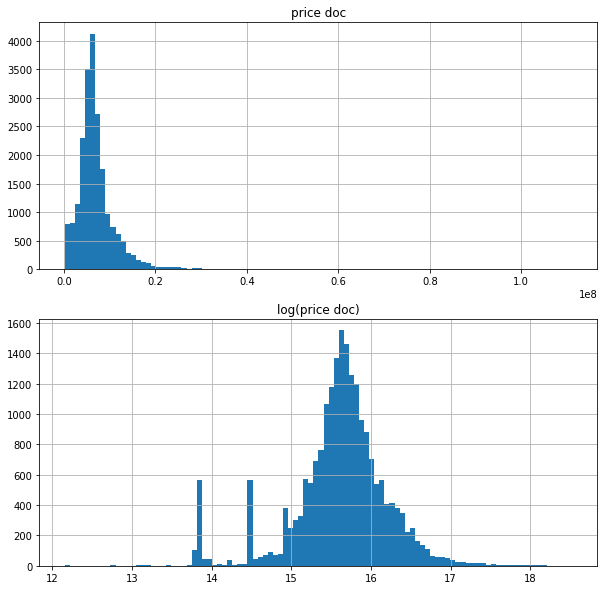

In [81]:
### BEGIN Solution (do not delete this comment)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].hist(y_train, bins=100)
axs[0].grid('on')
axs[0].set_title('price doc')
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
axs[1].hist(y_train_log, bins=100)
axs[1].grid('on')
axs[1].set_title('log(price doc)')
### END Solution (do not delete this comment)

**1.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [82]:
### BEGIN Solution (do not delete this comment)
print(f'Number of features in train and test: {X_train.shape[-1]}')
### END Solution (do not delete this comment)

Number of features in train and test: 557


**Your text answer (do not delete this comment)**:
<br><br>
**Too many features. Might lead to inefficiency so we should decide what features can really contribute to the predictions.**
<br><br>

**1.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

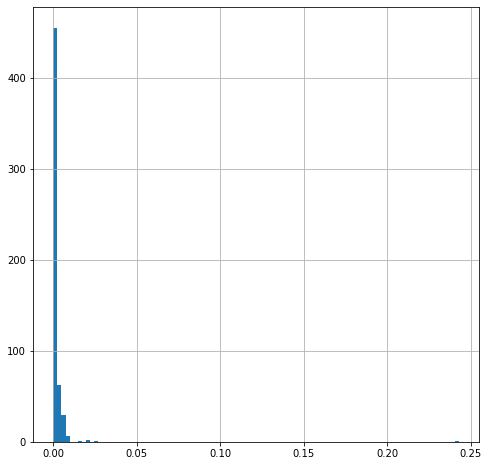

In [144]:
### BEGIN Solution (do not delete this comment)
from sklearn.ensemble import RandomForestRegressor

rndfor_classif = RandomForestRegressor(n_jobs=-1)
rndfor_classif.fit(X_train, y_train_log)

plt.figure(figsize=(8, 8))
plt.hist(rndfor_classif.feature_importances_, bins=100)
plt.grid('on')
### END Solution (do not delete this comment)

**1.1.7) print the names of the 20 most important features**

In [156]:
### BEGIN Solution (do not delete this comment)
importances = rndfor_classif.feature_importances_
feat_names = rndfor_classif.feature_names_in_
important_20 = feat_names[np.argsort(importances)[::-1][:20]]
print(important_20)
### END Solution (do not delete this comment)

['full_sq' 'sport_count_3000' 'cafe_count_2000' 'cafe_count_3000'
 'cafe_count_5000_price_2500' 'num_room' 'micex_cbi_tr' 'brent'
 'metro_km_avto' 'kindergarten_km' 'eurrub' 'swim_pool_km' 'exhibition_km'
 'ttk_km' 'cafe_count_5000' 'public_healthcare_km' 'micex' 'usdrub'
 'floor' 'catering_km']


<br>

### Subproblem 1.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets. 

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. on input takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**1.2.1) Implement the function described above**

In [179]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

def run_train_test(train: tuple, test: tuple, regressors: dict) -> pd.DataFrame:
    rmsle_table = {'Methods': [], 'Train error': [], 'Test error': []}
    for k, reg in zip(regressors.keys(), regressors.values()):
        start = time.time()
        print(f'{k} fitting...')
        reg.fit(*train)
        print(f'{k} predicting...')
        pred_train = reg.predict(train[0])
        pred_test = reg.predict(test[0])
        print(f'time spent {time.time() - start:.3} sec')
        
        rmsle_table['Methods'].append(k)
        rmsle_table['Train error'].append(mean_squared_log_error(train[1], pred_train, squared=False))
        rmsle_table['Test error'].append(mean_squared_log_error(test[1], pred_test, squared=False))
    
    return pd.DataFrame(rmsle_table)

### END Solution (do not delete this comment)

**1.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [182]:
### BEGIN Solution

features = [c for c in X_train.columns if c in important_20]
X_train_strip = X_train[features]
X_test_strip = X_test[features]

regressors = {
              'Linear Regression': LinearRegression(random_state=rnd_state),
              'Ridge': Ridge(random_state=rnd_state),
              'Decision Tree Regressor': DecisionTreeRegressor(random_state=rnd_state),
              'Random Forest': RandomForestRegressor(random_state=rnd_state)
             }
rmsle_table = run_train_test(train=(X_train_strip, y_train_log), test=(X_test_strip, y_test_log), regressors=regressors)
rmsle_table
### END Solution

Linear Regression fitting...
Linear Regression predicting...
time spent 0.0304 sec
Ridge fitting...
Ridge predicting...
time spent 0.0161 sec
Decision Tree Regressor fitting...
Decision Tree Regressor predicting...
time spent 0.464 sec
Random Forest fitting...
Random Forest predicting...
time spent 32.2 sec


,Methods,Train error,Test error
0,Linear Regression,1.043313e-03,0.001051
1,Ridge,1.043312e-03,0.001051
2,Decision Tree Regressor,1.158086e-09,0.001768
3,Random Forest,1.242940e-04,0.000867


<br>

### Subproblem 1.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find feature importances by applying the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

The decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks, 1.3.1 - 1.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**1.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure the model's "quality".** 

In [297]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution    
    return dict([(f, np.mean(cross_val_score(model, X[used_features | set([f])].values.reshape(X.shape[0], -1),
                                                y, cv=cv, scoring=make_scorer(mean_squared_log_error, 
                                                                              squared=False)))) 
                 for f in tqdm.tqdm_notebook(set(X.columns) - used_features)])
        
    ### END Solution

    return scores

**1.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in subtask 1 above) that would**

**- compute the model's "quality" over the currently *unused* features**

**- find the feature, which has given the best score and add it to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feature to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [310]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    best_score, i = 10, 0
    round = 0
    while round < n_rounds:
        round = round + 1
        scores = selection_step(model, X, y, set(feat_best_list))

        new_feature = min(scores, key=scores.get)
        
        if scores[new_feature] < best_score:
            best_score = scores[new_feature]
            round = 0            
        
        print('-------------------------------------------------------')
        print(f'Adding new feature: {new_feature} to feature set')
        feat_best_list.append(new_feature)
        print(f'New feature list {feat_best_list}')
        print(f'New score: {best_score}')
        print('-------------------------------------------------------')
        
        
        
    ### END Solution
    
    return feat_best_list


**1.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [308]:
### BEGIN Solution
import tqdm

tree = DecisionTreeRegressor(random_state=rnd_state)
best_features_cv = forward_steps(X_train, y_train_log, model=tree, n_rounds=2)
print('Print new 'best_features_cv)
### END Solution


0.0010667219443497085
Adding new feature: full_sq to feature set
New feature list ['full_sq']
New score: 0.0010667219443497085



0.0009867669241386823
Adding new feature: ecology_no data to feature set
New feature list ['full_sq', 'ecology_no data']
New score: 0.0009867669241386823



0.0009746170315983789
Adding new feature: sub_area_Nekrasovka to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka']
New score: 0.0009746170315983789



0.0009696455378171084
Adding new feature: sub_area_Poselenie Vnukovskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe']
New score: 0.0009696455378171084



0.0009664416517623297
Adding new feature: sub_area_Poselenie Novofedorovskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe']
New score: 0.0009664416517623297



0.000964230638976828
Adding new feature: sub_area_Poselenie Filimonkovskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe']
New score: 0.000964230638976828



0.0009624718496259805
Adding new feature: sub_area_Zapadnoe Degunino to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino']
New score: 0.0009624718496259805



0.0009608072865994184
Adding new feature: sub_area_Krylatskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe']
New score: 0.0009608072865994184



0.0009594038731649329
Adding new feature: sub_area_Hamovniki to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki']
New score: 0.0009594038731649329



0.0009583141484980646
Adding new feature: sub_area_Poselenie Krasnopahorskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe']
New score: 0.0009583141484980646



0.0009572536446997076
Adding new feature: sub_area_Zamoskvorech'e to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e"]
New score: 0.0009572536446997076



0.0009563483810523269
Adding new feature: sub_area_Troickij okrug to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug']
New score: 0.0009563483810523269



0.000955929825317658
Adding new feature: sub_area_Sokol'niki to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki"]
New score: 0.000955929825317658



0.0009552259401994671
Adding new feature: sub_area_Birjulevo Zapadnoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe']
New score: 0.0009552259401994671



0.0009546606278074387
Adding new feature: sub_area_Poselenie Kokoshkino to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino']
New score: 0.0009546606278074387



0.0009541832645579623
Adding new feature: sub_area_Poselenie Moskovskij to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij']
New score: 0.0009541832645579623



0.0009539411541202725
Adding new feature: sub_area_Begovoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe']
New score: 0.0009539411541202725



0.0009537511517998296
Adding new feature: sub_area_Arbat to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat']
New score: 0.0009537511517998296



0.0009534862409678631
Adding new feature: sub_area_Poselenie Shherbinka to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat', 'sub_area_Poselenie Shherbinka']
New score: 0.0009534862409678631



0.0009532481477985059
Adding new feature: sub_area_Poselenie Rogovskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat', 'sub_area_Poselenie Shherbinka', 'sub_area_Poselenie Rogovskoe']
New score: 0.0009532481477985059



0.000953120450864861
Adding new feature: sub_area_Babushkinskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat', 'sub_area_Poselenie Shherbinka', 'sub_area_Poselenie Rogovskoe', 'sub_area_Babushkinskoe']
New score: 0.000953120450864861



0.000953120696604069
Adding new feature: sub_area_Poselenie Voskresenskoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat', 'sub_area_Poselenie Shherbinka', 'sub_area_Poselenie Rogovskoe', 'sub_area_Babushkinskoe', 'sub_area_Poselenie Voskresenskoe']
New score: 0.000953120450864861



0.0009532088733837154
Adding new feature: sub_area_Vostochnoe to feature set
New feature list ['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Krasnopahorskoe', "sub_area_Zamoskvorech'e", 'sub_area_Troickij okrug', "sub_area_Sokol'niki", 'sub_area_Birjulevo Zapadnoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Poselenie Moskovskij', 'sub_area_Begovoe', 'sub_area_Arbat', 'sub_area_Poselenie Shherbinka', 'sub_area_Poselenie Rogovskoe', 'sub_area_Babushkinskoe', 'sub_area_Poselenie Voskresenskoe', 'sub_area_Vostochnoe']
New score: 0.000953120450864861
['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Krylatskoe', 'sub_area_Hamovniki',

**1.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE scores using these features. Remember the function you wrote earlier.**

In [311]:
### BEGIN Solution
rmsle_table_1 = run_train_test(train=(X_train[best_features_cv], y_train_log), 
                               test=(X_test[best_features_cv], y_test_log), 
                               regressors=regressors)

rmsle_table_1

### END Solution

Linear Regression fitting...
Linear Regression predicting...
time spent 0.172 sec
Ridge fitting...
Ridge predicting...
time spent 0.0277 sec
Decision Tree Regressor fitting...
Decision Tree Regressor predicting...
time spent 0.0432 sec
Random Forest fitting...
Random Forest predicting...
time spent 1.68 sec


,Methods,Train error,Test error
0,Linear Regression,0.001155,0.001119
1,Ridge,0.001155,0.001119
2,Decision Tree Regressor,0.000881,0.000938
3,Random Forest,0.000884,0.000927


In [18]:
### BEGIN Solution

### END Solution

EXPECTED OUTPUT FORMAT


,Methods,Train error,Test error
0,Linear Regression,0.001254,0.001256
1,Lasso,0.001369,0.001361
2,Ridge,0.001254,0.001256
3,Dtree,0.000018,0.002222
4,RFR,0.000185,0.001215


<br>

## Task 2. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [5]:
data = pd.read_csv('glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
58,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.0,0.00,1
90,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,2
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00,2


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform a 5-fold cross-validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [8]:
### BEGIN Solution (do not delete this comment)
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from time import time

classifiers = {'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=3), 
               'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=7), 
               'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5), 
               'LogisticRegression': LogisticRegression()}
scorer = make_scorer(f1_score, average='weighted')

def get_empty_dict():
    return {'Multiclass': [], 'OneVsRest': [], 'OneVsOne': []}
def make_df(dict_data):
    return pd.DataFrame(dict_data.values(), index=dict_data.keys(), columns=classifiers.keys())
scores_data = get_empty_dict()
time_data = get_empty_dict()

for k, model in zip(classifiers.keys(), classifiers.values()):
    print(f'Model {k} {model}')
    start = time()
    mean_score = np.mean(cross_val_score(model, X, y, cv=5, scoring=scorer))
    time_data['Multiclass'].append(time() - start)
    scores_data['Multiclass'].append(mean_score)    
    print('Multiclass done!')
    
    start = time()
    mean_score = np.mean(cross_val_score(OneVsRestClassifier(model), X, y, cv=5, scoring=scorer))
    time_data['OneVsRest'].append(time() - start)
    scores_data['OneVsRest'].append(mean_score)   
    print('OneVsRest done!')
    
    start = time()
    mean_score = np.mean(cross_val_score(OneVsOneClassifier(model), X, y, cv=5, scoring=scorer))
    time_data['OneVsOne'].append(time() - start)
    scores_data['OneVsOne'].append(mean_score) 
    print('OneVsOne done!')

# OneVsRestClassifier(Classifier)
print('Cross Validation Scores')
display(make_df(scores_data))
print('Training Duration CV=5')
display(make_df(time_data))
### END Solution (do not delete this comment)

Model RandomForestClassifier RandomForestClassifier(max_depth=3)
Multiclass done!
OneVsRest done!
OneVsOne done!
Model DecisionTreeClassifier DecisionTreeClassifier(max_depth=7)
Multiclass done!
OneVsRest done!
OneVsOne done!
Model KNeighborsClassifier KNeighborsClassifier()
Multiclass done!
OneVsRest done!
OneVsOne done!
Model LogisticRegression LogisticRegression()
Multiclass done!
OneVsRest done!
OneVsOne done!
Cross Validation Scores


,RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.514436,0.566182,0.577174,0.524475
OneVsRest,0.600357,0.492982,0.595097,0.497738
OneVsOne,0.568207,0.593671,0.591219,0.520127


Training Duration CV=5


,RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.781787,0.033331,0.040933,0.142642
OneVsRest,3.839444,0.140307,0.150427,0.853644
OneVsOne,9.600328,0.107862,0.244796,1.096502


**Which metric did you choose to optimize during cross validation and why? Explain**

**Your text answer (do not delete this comment)**:

* I have choosen **weighted F1 score** as F1 metric is already better metric when we deal with imbalanced classes in two-classes problem and weighted version of this metric expands this advantage on the multiclass problem by computing F1 per class and taking average considering the amount of occurences of the class in the dataset.


**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?**

**Your text answer (do not delete this comment)**:

* Decision tree improved performance in OneVsOne approach without significant increase in computation time. However for OneVsRest approach the performance of Decision tree decreased with increased computation time. For OneVsRest approach only RandomForest and KNN increased their scores while computational time increased quite noticably, as well.  

# Task 3. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions on the $ n $ -th fold are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be retrained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on the test set for each of the models.
* Train the metaclassifier (in this case, once again, it is just an ML model) on the original dataset's features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Report the training score of the meta-classifier on the $ n $-th fold. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain a better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More details about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [9]:
from sklearn import datasets
fc = sklearn.datasets.fetch_covtype(data_home='./')

Write meta classifier function.

In [31]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    from sklearn.model_selection import KFold
    split = KFold(cv)
    
    tr_feat = np.zeros((len(base_clfs), len(y_train)))
    tst_feat = np.zeros((len(base_clfs), len(X_test)))
    
    for tr_idx, tst_idx in split.split(X_train):
        for i, model in enumerate(base_clfs):
            print(f'Fitting model #{i}:  {model}')
            model.fit(X_train[tr_idx], y_train[tr_idx])
            tr_feat[i, tst_idx] = model.predict(X_train[tst_idx])
            
            model.fit(X_train, y_train)
            tst_feat[i, :] = model.predict(X_test)
            print('----------------------------')

    final_classifier.fit(tr_feat.T, y_train)
    y_pred = final_classifier.predict(tr_feat.T[tst_idx])
    print(f'Meta-classifier accuracy on the n-th fold: {accuracy_score(y_train[tst_idx], y_pred)}')
    y_pred = final_classifier.predict(tst_feat.T)
    
    return y_pred, final_classifier
        
    ### END Solution (do not delete this comment)
    pass

### Subproblem 3.1 (1 point)

**3.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [24]:
### BEGIN Solution (do not delete this comment)
rnd_state = 42
N = fc['data'].shape[0]
X_train, X_test, y_train, y_test = train_test_split(fc['data'], fc['target'], 
                                                    train_size=int(0.6*N), test_size=int(0.4*N), 
                                                    random_state=rnd_state)

from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

base_clfs = [RandomForestClassifier(n_estimators=150, max_depth=5, random_state=rnd_state, n_jobs=-1),
             ExtraTreesClassifier(n_estimators=100, random_state=rnd_state, n_jobs=-1),
             DecisionTreeClassifier(max_depth=5, random_state=rnd_state), 
             GaussianNB(), RidgeClassifier(),  LogisticRegression()] 
             
for i, clf in enumerate(base_clfs):
    print(f'Fitting model #{i}:  {clf}')
    clf.fit(X_train, y_train)
### END Solution (do not delete this comment)

Fitting model #0:  RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=-1,
                       random_state=42)
Fitting model #1:  ExtraTreesClassifier(n_jobs=-1, random_state=42)
Fitting model #2:  DecisionTreeClassifier(max_depth=5, random_state=42)
Fitting model #3:  GaussianNB()
Fitting model #4:  RidgeClassifier()
Fitting model #5:  LogisticRegression()


**3.1.2) Report individual scores on test set. As a score use accuracy.**

In [14]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import accuracy_score

for i, clf in enumerate(base_clfs):
    print(f'Predicting model #{i}:  {clf}')
    y_pred = clf.predict(X_test)
    print(f'resulting accuracy score: {accuracy_score(y_test, y_pred)}')
### END Solution (do not delete this comment)

Predicting model #0:  RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=-1,
                       random_state=42)
resulting accuracy score: 0.6857627235331578
Predicting model #1:  ExtraTreesClassifier(n_jobs=-1, random_state=42)
resulting accuracy score: 0.948374382540748
Predicting model #2:  DecisionTreeClassifier(max_depth=5, random_state=42)
resulting accuracy score: 0.7016875785270478
Predicting model #3:  GaussianNB()
resulting accuracy score: 0.4576513313023872
Predicting model #4:  RidgeClassifier()
resulting accuracy score: 0.6999449234952927
Predicting model #5:  LogisticRegression()
resulting accuracy score: 0.6218309495533639


### Subproblem 3.2 (1 point)

**3.2.1) Train metaclassifier (in this case, once again, it is just an ML model) on original dataset's features. And report score on test.**

In [39]:
### BEGIN Solution (do not delete this comment)
meta_model = ExtraTreesClassifier(n_estimators=100, random_state=rnd_state, n_jobs=-1)#DecisionTreeClassifier(max_depth=5, random_state=rnd_state)

meta_model.fit(X_train, y_train)
y_pred = meta_model.predict(X_test)

print(f'Accuracy of the meta ({meta_model}) model:', accuracy_score(y_test, y_pred))
### END Solution (do not delete this comment)

Accuracy of the meta (ExtraTreesClassifier(n_jobs=-1, random_state=42)) model: 0.948374382540748


**3.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Report the training score of the meta-classifier on the $ n $-th fold. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [40]:
### BEGIN Solution (do not delete this comment)
y_pred = meta_classifier(base_clfs, meta_model, X_train, X_test, y_train, cv=5)
### END Solution (do not delete this comment)

Fitting model #0:  RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=-1,
                       random_state=42)
----------------------------
Fitting model #1:  ExtraTreesClassifier(n_jobs=-1, random_state=42)
----------------------------
Fitting model #2:  DecisionTreeClassifier(max_depth=5, random_state=42)
----------------------------
Fitting model #3:  GaussianNB()
----------------------------
Fitting model #4:  RidgeClassifier()
----------------------------
Fitting model #5:  LogisticRegression()
----------------------------
Fitting model #0:  RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=-1,
                       random_state=42)
----------------------------
Fitting model #1:  ExtraTreesClassifier(n_jobs=-1, random_state=42)
----------------------------
Fitting model #2:  DecisionTreeClassifier(max_depth=5, random_state=42)
----------------------------
Fitting model #3:  GaussianNB()
----------------------------
Fitting model #4:  RidgeClassifier()
----

**3.2.3) Report score(accuracy) on test.**

In [41]:
### BEGIN Solution (do not delete this comment)
print(f'Meta-classifier accuracy on the test: {accuracy_score(y_test, y_pred[0])}')
### END Solution (do not delete this comment)

Meta-classifier accuracy on the test: 0.9483528682810967


**3.2.4) Does stacking helped to gain a better score?**

**Your text answer (do not delete this comment)**:

The best model from the base models (ExtraTreeClassifier) has score 0.94. The stacking procedure didn't improve this score, what might be due to the poor quality of the base models. Maybe if we replaced GaussianNB with something else we would get some improvement. However, as I know stacking is not used to gain remarkable changes in score, it is applied to squeeze some slight improvement.